---
title: "Titanic Wrangling"
author: Karisa Kopecek
date: today
format:
  html:
    embed-resources: true
    echo: true
---

# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
# Import the titanic dataset here
import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [2]:
# Code here
df_pass = df_titanic[df_titanic["class"].isin(["1st", "2nd", "3rd"])]

cross_tab = pd.crosstab(df_pass["class"], df_pass["embarked"])

cross_tab

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [3]:
# Code here
# Conditional distribution of class given embarkation port
# P(Class | Embarked) - normalize by columns
#index based on second one beibng embarked which is a column
cond_class_given_embarked = pd.crosstab(df_pass["class"], df_pass["embarked"], normalize="columns")

cond_class_given_embarked

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [4]:
# Conditional distribution of embarkation port given class
# P(Embarked | Class) - normalize by rows
cond_embarked_given_class = pd.crosstab(df_pass["class"], df_pass["embarked"], normalize="index")

cond_embarked_given_class

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


In [5]:
# Answer the questions:
# What proportion of 3rd class passengers embarked at Southampton?
prop_3rd_southampton = cond_embarked_given_class.loc["3rd", "S"]

# What proportion of Southampton passengers were in 3rd class?
prop_southampton_3rd = cond_class_given_embarked.loc["3rd", "S"]

prop_3rd_southampton, prop_southampton_3rd

(np.float64(0.6967559943582511), np.float64(0.5404814004376368))

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

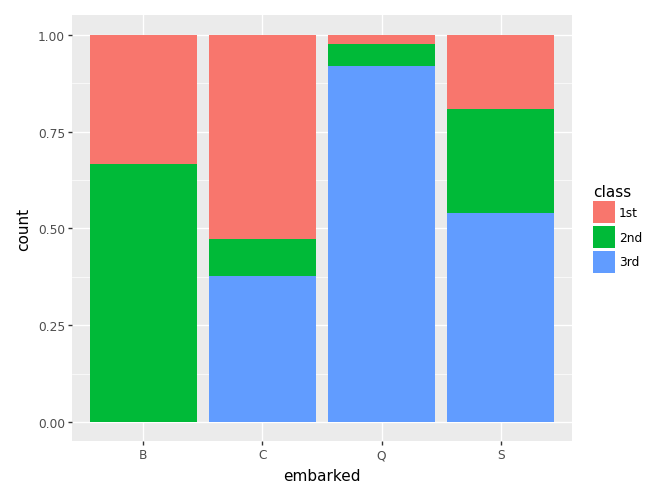

In [6]:
# Code here
from plotnine import geom_bar, ggplot, aes

(ggplot(df_pass, aes(x="embarked", fill="class"))
 + geom_bar(position="fill"))


Pros: The stacked bar chart provides an immediate visual comparison of the embarkation port distributions across all three classes simultaneously. It is easier to see patterns in the visualization like how Southampton dominated 3rd class.

Cons: Reading exact proportions from the visualization is difficult compared to the numerical tables. I can easily see the numbers in the tables.